In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2680a88971079d55fa25a4ddd72583af


In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 6 of Set 25 | kruisfontein
Processing Record 7 of Set 25 | adrar
Processing Record 8 of Set 25 | gandajika
Processing Record 9 of Set 25 | dehui
Processing Record 10 of Set 25 | kodiak
Processing Record 11 of Set 25 | hobart
Processing Record 12 of Set 25 | albany
Processing Record 13 of Set 25 | russellville
Processing Record 14 of Set 25 | saint george
Processing Record 15 of Set 25 | leningradskiy
Processing Record 16 of Set 25 | chilca
Processing Record 17 of Set 25 | los llanos de aridane
Processing Record 18 of Set 25 | butaritari
Processing Record 19 of Set 25 | rungata
City not found. Skipping...
Processing Record 20 of Set 25 | haines junction
Processing Record 21 of Set 25 | raymondville
Processing Record 22 of Set 25 | atuona
Processing Record 23 of Set 25 | bambous virieux
Processing Record 24 of Set 25 | nome
Processing Record 25 of Set 25 | ponta do sol
Processing Record 26 of Set 25 | vaini
Processing Record 27 of Set 25 | jamestown
Processing Record 28

Processing Record 33 of Set 28 | shilovo
Processing Record 34 of Set 28 | spetsai
City not found. Skipping...
Processing Record 35 of Set 28 | esso
Processing Record 36 of Set 28 | rawson
Processing Record 37 of Set 28 | lere
Processing Record 38 of Set 28 | dong hoi
Processing Record 39 of Set 28 | susangerd
Processing Record 40 of Set 28 | jumla
Processing Record 41 of Set 28 | ashqelon
Processing Record 42 of Set 28 | umm kaddadah
Processing Record 43 of Set 28 | khatanga
Processing Record 44 of Set 28 | kirakira
Processing Record 45 of Set 28 | avarua
Processing Record 46 of Set 28 | uniao
Processing Record 47 of Set 28 | korhogo
Processing Record 48 of Set 28 | sao luiz gonzaga
Processing Record 49 of Set 28 | lebyazhye
Processing Record 50 of Set 28 | chara
Processing Record 1 of Set 29 | manado
Processing Record 2 of Set 29 | kollumerland
City not found. Skipping...
Processing Record 3 of Set 29 | general roca
Processing Record 4 of Set 29 | nabire
Processing Record 5 of Set 29 

Processing Record 14 of Set 32 | biak
Processing Record 15 of Set 32 | thinadhoo
Processing Record 16 of Set 32 | samusu
City not found. Skipping...
Processing Record 17 of Set 32 | mulchen
Processing Record 18 of Set 32 | awjilah
Processing Record 19 of Set 32 | gibsons
Processing Record 20 of Set 32 | geraldton
Processing Record 21 of Set 32 | cochrane
Processing Record 22 of Set 32 | miranorte
City not found. Skipping...
Processing Record 23 of Set 32 | cartagena
Processing Record 24 of Set 32 | douentza
Processing Record 25 of Set 32 | les cayes
Processing Record 26 of Set 32 | sweetwater
Processing Record 27 of Set 32 | bitung
Processing Record 28 of Set 32 | clyde river
Processing Record 29 of Set 32 | gladstone
Processing Record 30 of Set 32 | male
Processing Record 31 of Set 32 | santa isabel
Processing Record 32 of Set 32 | waipawa
Processing Record 33 of Set 32 | sloboda
Processing Record 34 of Set 32 | itoman
Processing Record 35 of Set 32 | darhan
Processing Record 36 of Se

Processing Record 4 of Set 36 | birao
Processing Record 5 of Set 36 | ouesso
Processing Record 6 of Set 36 | paradwip
City not found. Skipping...
Processing Record 7 of Set 36 | biltine
Processing Record 8 of Set 36 | usinsk
Processing Record 9 of Set 36 | richards bay
Processing Record 10 of Set 36 | lasa
Processing Record 11 of Set 36 | lagoa
Processing Record 12 of Set 36 | shingu
Processing Record 13 of Set 36 | shache
Processing Record 14 of Set 36 | fuerte olimpo
Processing Record 15 of Set 36 | niono
Processing Record 16 of Set 36 | maniitsoq
Processing Record 17 of Set 36 | zhangjiakou
Processing Record 18 of Set 36 | chernyshevskiy
Processing Record 19 of Set 36 | wanaka
Processing Record 20 of Set 36 | formoso do araguaia
City not found. Skipping...
Processing Record 21 of Set 36 | rudnaya pristan
Processing Record 22 of Set 36 | palmer
Processing Record 23 of Set 36 | cockburn town
Processing Record 24 of Set 36 | yamada
Processing Record 25 of Set 36 | alta floresta
Process

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,66.99,84,0,1.01,ZA,2021-02-02 23:17:19
1,Adrar,20.5022,-10.0711,70.39,22,89,8.41,MR,2021-02-02 23:18:11
2,Gandajika,-6.7500,23.9500,65.39,93,59,2.75,CD,2021-02-02 23:18:11
3,Dehui,44.5333,125.7000,-11.20,58,0,8.95,CN,2021-02-02 23:18:11
4,Kodiak,57.7900,-152.4072,35.60,80,90,14.97,US,2021-02-02 23:14:29
5,Hobart,-42.8794,147.3294,62.01,63,75,3.44,AU,2021-02-02 23:16:28
6,Albany,42.6001,-73.9662,26.01,87,100,12.84,US,2021-02-02 23:17:50
7,Russellville,35.2784,-93.1338,50.00,46,1,4.61,US,2021-02-02 23:16:07
8,Saint George,37.1041,-113.5841,66.20,39,90,2.64,US,2021-02-02 23:18:11
9,Leningradskiy,69.3833,178.4167,-4.38,87,100,17.36,RU,2021-02-02 23:18:11


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [31]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2021-02-02 23:17:19,-34.0033,24.7314,66.99,84,0,1.01
1,Adrar,MR,2021-02-02 23:18:11,20.5022,-10.0711,70.39,22,89,8.41
2,Gandajika,CD,2021-02-02 23:18:11,-6.7500,23.9500,65.39,93,59,2.75
3,Dehui,CN,2021-02-02 23:18:11,44.5333,125.7000,-11.20,58,0,8.95
4,Kodiak,US,2021-02-02 23:14:29,57.7900,-152.4072,35.60,80,90,14.97
5,Hobart,AU,2021-02-02 23:16:28,-42.8794,147.3294,62.01,63,75,3.44
6,Albany,US,2021-02-02 23:17:50,42.6001,-73.9662,26.01,87,100,12.84
7,Russellville,US,2021-02-02 23:16:07,35.2784,-93.1338,50.00,46,1,4.61
8,Saint George,US,2021-02-02 23:18:11,37.1041,-113.5841,66.20,39,90,2.64
9,Leningradskiy,RU,2021-02-02 23:18:11,69.3833,178.4167,-4.38,87,100,17.36


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

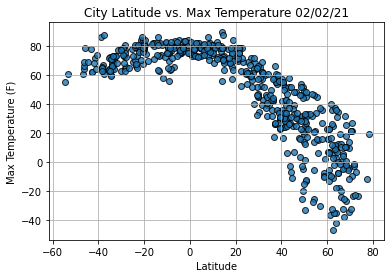

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

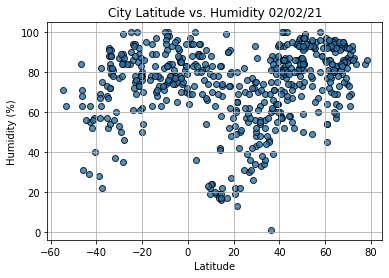

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

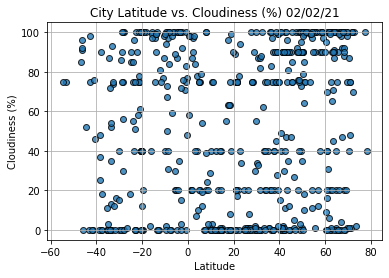

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

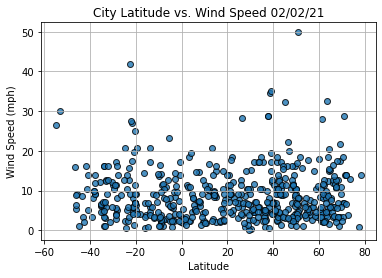

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

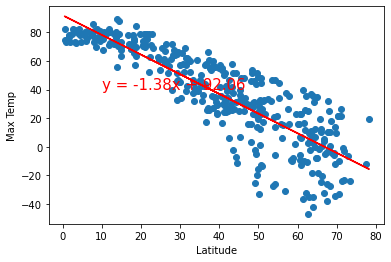

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

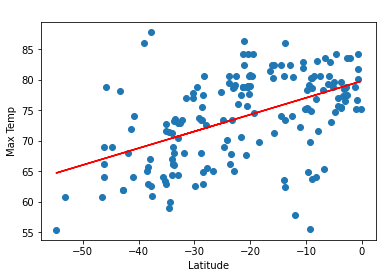

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

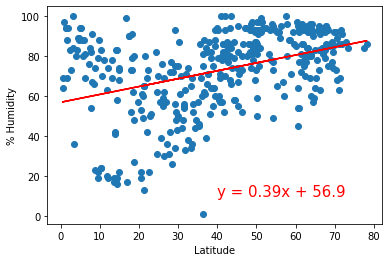

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

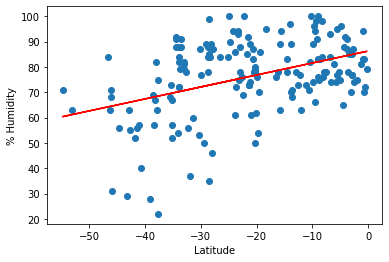

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

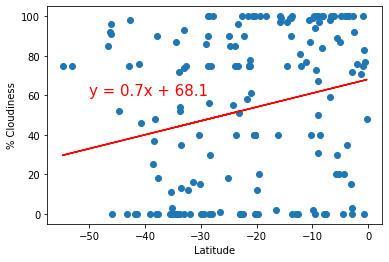

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

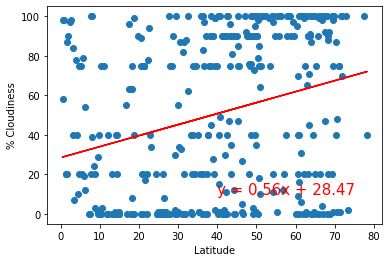

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

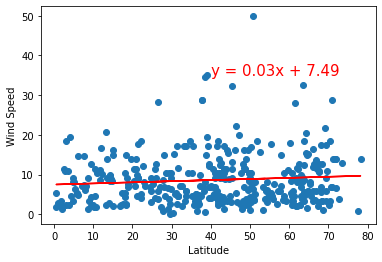

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

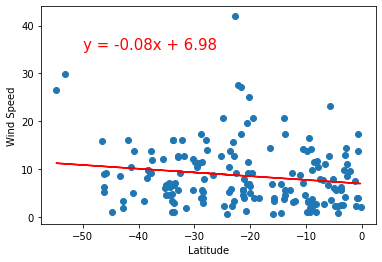

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))